# Prediction using Supervised Machine Learning 

Author : RUSHIKESH LOKHANDE

TSF GRIT DATA SCIENCE AND BUSINESS ANALYTICS INTERN TASK 1

Problem Statement:- 1. Predict the percentages of student based on number of study hours.
                    2. What will be the score if a student studies 9.25 hours/day?

Step 1: Importing the required Libaries and Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
link = "http://bit.ly/w-data"
df = pd.read_csv(link)
print("Data has been succefully imported")

df.head()

Data has been succefully imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Step 2: Analyzing the Data for Null Values and Errors

In [3]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

There is no null or errors in this dataset. So we can proceed for plotting the data.

In [4]:
df.shape

(25, 2)

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Step 3: Plotting the Data

Let's do the Data Visulaztion first.

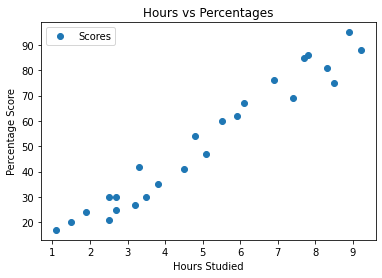

In [6]:
df.plot(x ="Hours", y="Scores", style ="o")
plt.title("Hours vs Percentages")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

From the above graph, it can be concluded that there is positive linear relation between the number of hours studied and percentage of score.
So in this case, we'll apply Linear regrassion model.

Step 4: Preparing the Data

Dividing the Data

In [7]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

Now, we will split the data into training and test set by using 'Scikitlearn's' built-in method.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size= 0.2, random_state=0)

Training the Algorithm

In [9]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

# Fitiing the model

reg.fit(X_train, Y_train)

print("Training Completed")

Training Completed


Plotting the Regression Lines

In [10]:
line = reg.coef_*X+reg.intercept_
print(line)

[[26.79480124]
 [52.56250809]
 [33.73226078]
 [86.25874013]
 [36.70545772]
 [16.88414476]
 [93.19619966]
 [56.52677068]
 [84.27660883]
 [28.77693254]
 [78.33021494]
 [60.49103328]
 [46.6161142 ]
 [34.72332643]
 [12.91988217]
 [90.22300272]
 [26.79480124]
 [20.84840735]
 [62.47316457]
 [75.357018  ]
 [28.77693254]
 [49.58931115]
 [39.67865467]
 [70.40168976]
 [79.32128059]]


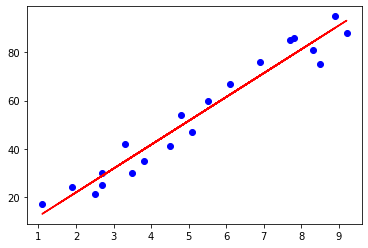

In [11]:
# Plotting the Testing Data.

plt.scatter(X_train,Y_train, color = "blue")
plt.plot(X,line, color="red")
plt.show()

In [12]:
# Retriving intercept and Coefficient


print("Intercept is ", reg.intercept_)
print("Coefficient is ", reg.coef_)

Intercept is  2.018160041434662
Coefficient is  [9.91065648]


Above Calculations show that if a student dedicate one hour more than previous study time for an exam, they can expect to achieve an increase of 9.78% in the score.

In [13]:
print(X_test)                   # Testing Data
y_pred = reg.predict(X_test)    # Predecting the Score

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


Step 5: Comparing the Actual Data to Predecticted Data

In [14]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


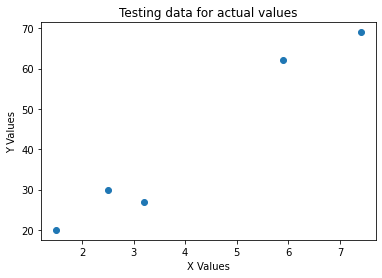

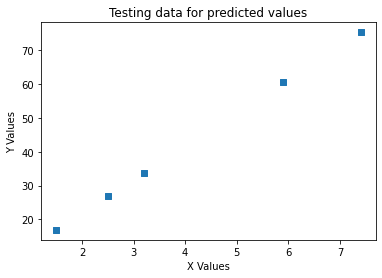

In [15]:
# Visualizing predicted and actual values

plt.scatter(X_test, Y_test)
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.title("Testing data for actual values")
plt.show()

plt.scatter(X_test, y_pred, marker="s")
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.title("Testing data for predicted values")
plt.show()

Step 6: Evaluation

Evaluating the regression algorithm with three common matrics- Mean Absolute Error, Mean Squared Error and Root Mean Squared Error.

In [16]:
from sklearn import metrics
print("Mean Absolute Error: ", metrics.mean_absolute_error(Y_test, y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(Y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error:  4.183859899002982
Mean Squared Error:  21.598769307217456
Root Mean Squared Error:  4.647447612100373


Making Prediction
Answer for problem statement

In [17]:
hours = [9.25]
own_pred = reg.predict([hours])
print("The predicted score if a person studies for",hours,"hours is",own_pred[0]) 

The predicted score if a person studies for [9.25] hours is 93.69173248737539
